In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\\Users\\Admin\\Downloads\\Supermart Grocery Sales\\Supermart Grocery Sales - Retail Analytics Dataset.csv")
df.head()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
df.describe()

,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


In [6]:
df.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [12]:
df = df.dropna(subset=['Sales', 'Order Date','Category'])

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Month'] = df['Order Date'].dt.to_period('M')
df['Year'] = df['Order Date'].dt.year

In [16]:
total_revenue = df["Sales"].sum()
total_orders = df["Order ID"].nunique()
total_customers = df["Customer Name"].nunique()

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)

Total Revenue: 6053500
Total Orders: 4042
Total Customers: 50


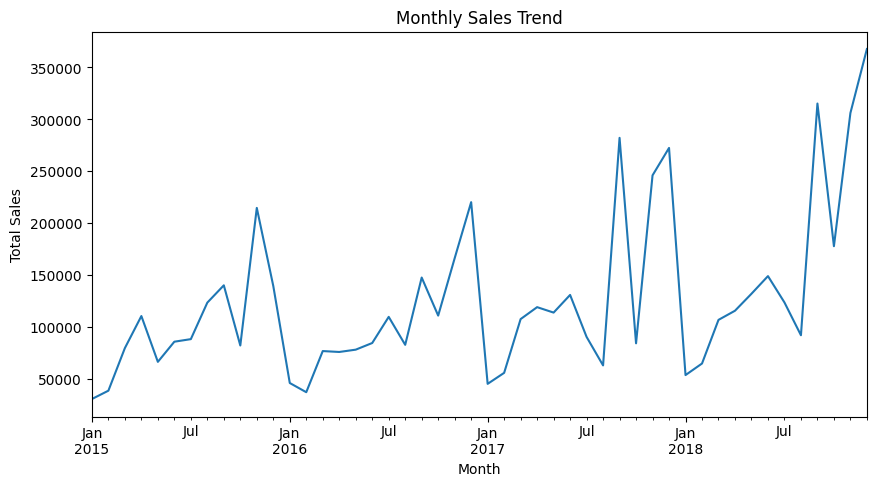

In [18]:
monthly_sales = df.groupby("Month")["Sales"].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales")
plt.show()


In [21]:
category_sales = df.groupby("Category")["Sales"].sum().sort_values(ascending=False)
category_sales


Category
Eggs, Meat & Fish    948304
Snacks               910849
Fruits & Veggies     877861
Bakery               869538
Food Grains          833326
Oil & Masala         833099
Beverages            780523
Name: Sales, dtype: int64

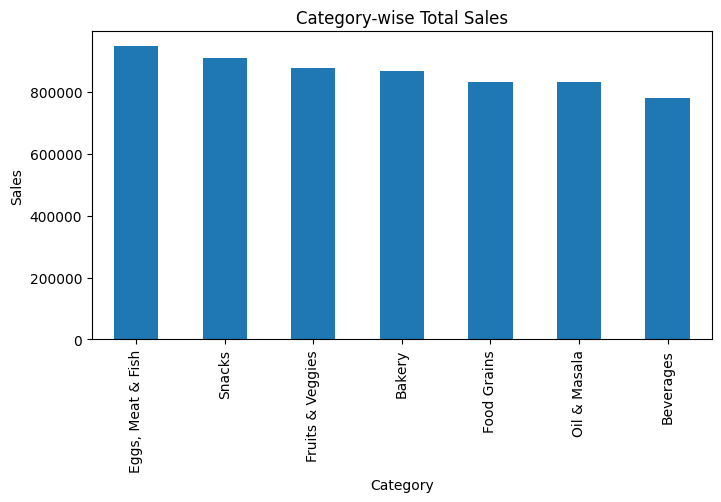

In [22]:
category_sales.plot(kind="bar", figsize=(8,4))
plt.title("Category-wise Total Sales")
plt.ylabel("Sales")
plt.show()

In [23]:
subcat_sales = df.groupby("Sub Category") ["Sales"].sum().sort_values(ascending=False)
subcat_sales.head(10)

Sub Category
Soft Drinks          393624
Health Drinks        386899
Breads & Buns        321236
Masalas              313584
Chocolates           307283
Noodles              303298
Cookies              300268
Cakes                294379
Mutton               266301
Edible Oil & Ghee    262646
Name: Sales, dtype: int64

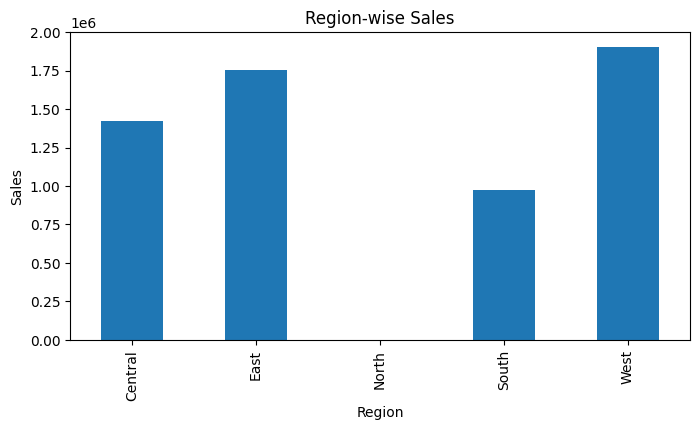

In [25]:
region_sales = df.groupby("Region")["Sales"].sum()

region_sales.plot(kind="bar", figsize=(8,4))
plt.title("Region-wise Sales")
plt.ylabel("Sales")
plt.show()


In [26]:
state_sales = df.groupby("State")["Sales"].sum().sort_values(ascending=False)
state_sales.head(10)

State
Tamil Nadu    6053500
Name: Sales, dtype: int64

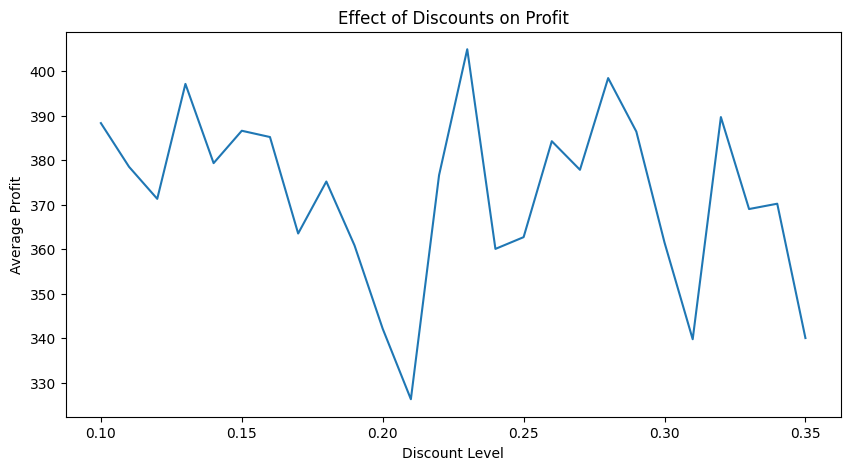

In [28]:
discount_profit = df.groupby("Discount")["Profit"].mean()

plt.figure(figsize=(10,5))
discount_profit.plot()
plt.title("Effect of Discounts on Profit")
plt.xlabel("Discount Level")
plt.ylabel("Average Profit")
plt.show()


In [29]:
profit_by_category = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
profit_by_category

Category
Eggs, Meat & Fish    234050.78
Snacks               232451.25
Fruits & Veggies     221754.77
Bakery               212309.89
Food Grains          207840.63
Oil & Masala         205029.13
Beverages            189622.58
Name: Profit, dtype: float64